Enter start point (row, col): 0,0
Enter goal point (row, col): 4,3
Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (2, 4), (3, 4), (4, 4), (4, 3)]


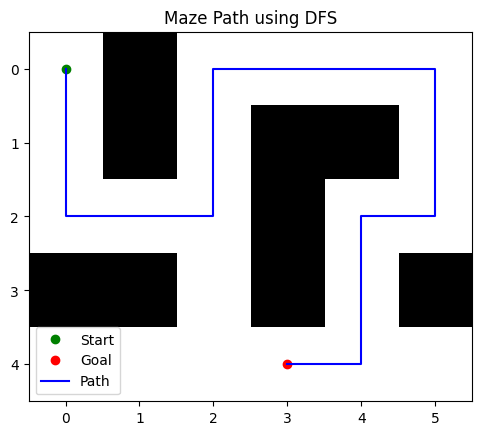

In [18]:
import matplotlib.pyplot as plt
import numpy as np


maze = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0]
]


rows, cols = len(maze), len(maze[0])



start = tuple(map(int, input("Enter start point (row, col): ").split(',')))
goal = tuple(map(int, input("Enter goal point (row, col): ").split(',')))



visited = set()
path = []

# DFS function
def dfs(maze, current, goal):
    row, col = current


    if not (0 <= row < rows and 0 <= col < cols) or maze[row][col] == 1 or current in visited:
        return False


    visited.add(current)
    path.append(current)

    # Check if goal is reached
    if current == goal:
        return True


    neighbors = [(row - 1, col), (row, col + 1), (row + 1, col), (row, col - 1)]
    for next_node in neighbors:
        if dfs(maze, next_node, goal):
            return True


    path.pop()
    return False


if dfs(maze, start, goal):
    print("Path found:", path)
else:
    print("No path found.")


def visualize_maze(maze, path, start, goal):
    maze_array = np.array(maze)
    plt.imshow(maze_array, cmap="Greys", origin="upper")


    plt.plot(start[1], start[0], "go", label="Start")  # Start in green
    plt.plot(goal[1], goal[0], "ro", label="Goal")    # Goal in red


    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, "b-", label="Path")  # Path in blue

    # Labels and legend
    plt.legend()
    plt.title("Maze Path using DFS")
    plt.show()

# Call visualization function
visualize_maze(maze, path, start, goal)
